<a href="https://colab.research.google.com/github/ritzdevp/team-samosa-tvqa/blob/main/Code/vis_concept_localizer_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [245]:
!wget http://tvqa.cs.unc.edu/files/det_visual_concepts_hq.pickle.tar.gz

--2022-04-30 20:38:57--  http://tvqa.cs.unc.edu/files/det_visual_concepts_hq.pickle.tar.gz
Resolving tvqa.cs.unc.edu (tvqa.cs.unc.edu)... 152.2.132.230
Connecting to tvqa.cs.unc.edu (tvqa.cs.unc.edu)|152.2.132.230|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100718745 (96M) [application/x-gzip]
Saving to: ‘det_visual_concepts_hq.pickle.tar.gz.1’

det_visual_concepts 100%[===================>]  96.05M  24.1MB/s    in 4.0s    

2022-04-30 20:39:01 (24.1 MB/s) - ‘det_visual_concepts_hq.pickle.tar.gz.1’ saved [100718745/100718745]



In [2]:
!tar -xvf det_visual_concepts_hq.pickle.tar.gz

det_visual_concepts_hq.pickle


In [410]:
import pickle
import json
import os
import numpy as np
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt

In [4]:
vis_concepts = pickle.load(open('det_visual_concepts_hq.pickle', 'rb'))

In [ ]:
#vis_concepts is a dictionary with key as vid name and each key has a list of detected objects for each frame i.e. list of lists

In [5]:
vis_concepts['s09e14_seg02_clip_04'][1]

'pillow , pillow , woman , pink shirt , mouth , shirt , button , couch , brown blanket , logo , hair , face , books , woman , bookshelf , logo'

In [6]:
with open('vis_concepts_json.json', 'w') as fp:
    json.dump(vis_concepts, fp, indent=4)

In [7]:
vis_concepts_2 = None
with open('vis_concepts_json.json', 'r') as fp:
    vis_concepts_2 = json.load(fp)

In [8]:
vis_concepts_2['s09e14_seg02_clip_04'][1]

'pillow , pillow , woman , pink shirt , mouth , shirt , button , couch , brown blanket , logo , hair , face , books , woman , bookshelf , logo'

In [10]:
!wget http://nlp.stanford.edu/data/wordvecs/glove.6B.zip

--2022-04-30 17:00:08--  http://nlp.stanford.edu/data/wordvecs/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/wordvecs/glove.6B.zip [following]
--2022-04-30 17:00:08--  https://nlp.stanford.edu/data/wordvecs/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/wordvecs/glove.6B.zip [following]
--2022-04-30 17:00:09--  http://downloads.cs.stanford.edu/nlp/data/wordvecs/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182753 (822M) [applic

In [11]:
!unzip /content/glove.6B.zip

Archive:  /content/glove.6B.zip
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       
  inflating: glove.6B.50d.txt        


# GLOVE Embedding Matrix

In [19]:
#GLOVE EMBEDDING MATRIX

embedding_index = {}
f = open('/content/glove.6B.50d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embedding_index[word] = coefs
f.close()

In [23]:
embedding_index['hello'].dtype

dtype('float32')

In [139]:
dog = np.array(embedding_index['dog'])
cat = np.array(embedding_index['cat'])
house = np.array(embedding_index['house'])
room = np.array(embedding_index['room'])
vikram = np.array(embedding_index['vikram'])
india = np.array(embedding_index['india'])
john = np.array(embedding_index['john'])
who = np.array(embedding_index['who'])
what = np.array(embedding_index['what'])
woman = np.array(embedding_index['woman'])

In [142]:
print("dog cat", dog.dot(cat))
print("dog house", dog.dot(house))
print("cat house", cat.dot(house))
print("house room", house.dot(room))
print("vikram india", vikram.dot(india))
print("john india", john.dot(india))
print("john vikram", vikram.dot(john))
print("who woman", who.dot(woman))
print("what woman", what.dot(woman))
print("what house", what.dot(house))
print("what cat", what.dot(cat))

dog cat 19.739067
dog house 9.921512
cat house 6.9394374
house room 18.781466
vikram india 9.713152
john india 5.999743
john vikram 3.9588647
who woman 21.827484
what woman 16.970638
what house 16.81825
what cat 10.410943


In [212]:
india.dot(house)

10.760592

In [202]:
one = []
one.append(dog)
one.append(cat)
one.append(house)
one = np.array(one)
two = []
two.append(cat)
two.append(india)
two = np.array(two)
print(one.shape)
print(two.shape)

(3, 50)
(2, 50)


In [206]:
print(one.dot(two.T))

[[19.73907    7.004026 ]
 [19.42926    6.1604824]
 [ 6.939438  10.760593 ]]


In [74]:
# embedding_index['pink shirt'] //not found, only single words are there.

KeyError: ignored

In [49]:
!pip install urllib

ERROR: Could not find a version that satisfies the requirement urllib (from versions: none)
ERROR: No matching distribution found for urllib


In [81]:
arr = vis_concepts['s09e14_seg02_clip_04'][0]

In [87]:
"hello".split()

['hello']

In [120]:
def get_detected_objects(episode, index):
  x = vis_concepts[episode][index].strip().split(",")
  y = []
  for w in x:
    y.append(w.strip())
  return y

In [173]:
arr = get_detected_objects('s09e14_seg02_clip_04', 0)

In [175]:
def phrase_splitter(arr):
  new_arr = []
  for w in arr:
    temp = w.split()
    for t in temp:
      if (t not in new_arr):
        new_arr.append(t)
  return new_arr

In [176]:
arr = phrase_splitter(arr)

In [177]:
print(arr)

['pillow', 'woman', 'pink', 'shirt', 'mouth', 'button', 'hair', 'couch', 'brown', 'blanket', 'logo', 'bookshelf', 'face', 'eyes', 'books']


In [192]:
def get_glove_wordlist_embedding(arr_of_words):
  glove_wordlist_embedding = []
  for w in arr_of_words:
    if (w in embedding_index):
      glove_wordlist_embedding.append(embedding_index[w])
  glove_wordlist_embedding = np.array(glove_wordlist_embedding)
  return glove_wordlist_embedding


In [179]:
arr_embedding = get_glove_wordlist_embedding(arr)

In [181]:
print(arr_embedding.shape)

(15, 50)


In [182]:
question = "What is the color of the woman's jacket?"

In [183]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwordslist = stopwords.words('english')
stopwordslist.append("?")
exceptlist = ["what", "who", "whom", "how", "where", "why"]
for w in exceptlist:
  stopwordslist.remove(w)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [223]:
def tokenize_question(question):
  words = nltk.word_tokenize(question)
  filtered_words = [word.lower() for word in words if word.lower() not in stopwordslist ]
  qarr = []
  for w in filtered_words:
    if w in embedding_index:
      qarr.append(w)
  return qarr

In [224]:
tokenize_question("hello what are you boy?")

['hello', 'what', 'boy']

In [194]:
# qnp = get_glove_wordlist_embedding(qarr)

In [195]:
# print(arr_embedding.shape)
# print(qnp.shape)

(15, 50)
(5, 50)


In [213]:
score_matrix = arr_embedding.dot(qnp.T)

In [214]:
score = np.sum(score_matrix)

In [215]:
print(score)

914.1483


In [197]:
# print(arr_embedding.dot(qnp.T).shape)

(15, 5)


### Note: Avg number of objects detected = 12
### Min number of objects detected = 1
### MAx number of objects detected = 16

In [449]:
def relevance_score(episode, frame_index, question):
  #function to get relevance score between question and detected objects in a frame
  detected_objects_list = get_detected_objects(episode, frame_index)[:10]
  words = nltk.word_tokenize(question)

  #to split words like "pink shirt" to "pink" and "shirt"
  detected_objects_list = phrase_splitter(detected_objects_list)

  #num_det is number of words in detected objects list
  #num_q is number of words in question
  det_objs_embedding_matrix = get_glove_wordlist_embedding(detected_objects_list) #num_det x 50
  question_embedding_matrix = get_glove_wordlist_embedding(tokenize_question(question)) #num_q x 50

  score_matrix = det_objs_embedding_matrix.dot(question_embedding_matrix.T)  #num_det x num_q
  score = np.sum(score_matrix)

  return score_matrix, score

In [303]:
mat, s = relevance_score('s09e14_seg02_clip_04', 0, "What is the color of the woman's jacket?")
print(s)

632.6353


In [282]:
mat, s = relevance_score('s09e14_seg02_clip_04', 120, "What is Sheldon holding?")
print(s)

225.37006


In [310]:
### function that returns the window of frames having the maximum relevance score
vid_name = 's09e14_seg02_clip_04'
window_size = 5
num_frames = len(vis_concepts[vid_name])

In [342]:
### returns maximum sum subarray of given window size

def get_maxsum_subarray(myarr, window_size):
  start = 0
  sum = 0
  currlen = 0
  ws = window_size
  maxsum = 0
  maxindexend = -1
  for i in range(len(myarr)):
    sum += myarr[i]
    currlen += 1
    if (currlen > ws):
      sum -= myarr[i - ws]
      currlen -= 1
    
    if (sum > maxsum):
      maxsum = sum
      maxindexend = i
  
  maxstartindex = maxindexend - ws + 1
  return maxstartindex, maxsum

In [351]:
myarr = [1,2,3,4,9,9,7,6,5,4]
start, maxsum = get_maxsum_subarray(myarr, 4)
print(myarr[start:start + 4])
print(maxsum)

[9, 9, 7, 6]
31


In [450]:
### returns relevance scores of all frames for the given question
def get_relevance_scorelist(vid_name, question):
  num_frames = len(vis_concepts[vid_name])
  score_list = np.zeros(num_frames)

  max_score_index = -1
  max_score = 0
  min_score_index = -1
  min_score = 10000

  for frame_index in range(num_frames):
    score_matrix, score = relevance_score(vid_name, frame_index, question)
    score_list[frame_index] = score
    if (score > max_score):
      max_score = score
      max_score_index = frame_index
    if (score < min_score):
      min_score = score
      min_score_index = frame_index

  return score_list, max_score_index, min_score_index

In [451]:
question = "What is the color of the woman's jacket?"
vid_name = 's09e14_seg02_clip_04'
window_size = 10
score_list, max_score_index, min_score_index = get_relevance_scorelist(vid_name, question)

In [452]:
min_score_index

148

In [453]:
def make_link(vid_name, frame_index):
  dummy = "https://tvqammml.s3.us-east-1.amazonaws.com/"
  temp = "00000"
  temp = (temp + str(frame_index))[-5:]
  url = dummy + vid_name + '/' + temp + '.jpg'
  return url

In [454]:
start_index, max_score = get_maxsum_subarray(score_list, window_size)
print(max_score)

8270.416625976562


In [455]:
print(score_list[start_index:start_index+window_size])
print(max_score_index)
print(start_index)

[852.41320801 874.08221436 765.10559082 775.60913086 908.08642578
 799.61322021 765.10559082 821.68017578 852.53314209 856.18792725]
129
42


In [456]:
def plot_image_from_url(url):
  image = io.imread(url)
  plt.imshow(image)
  plt.show()

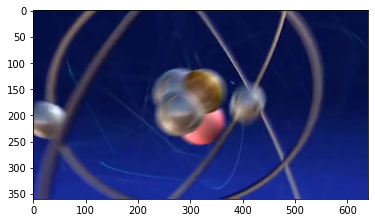

In [457]:
link = make_link('s09e14_seg02_clip_04', min_score_index)
plot_image_from_url(link)

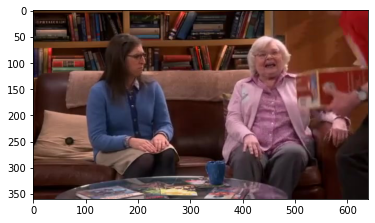

In [458]:
link = make_link('s09e14_seg02_clip_04', max_score_index)
plot_image_from_url(link)

In [418]:
start_index
end_index = start_index + window_size
dummy = "https://tvqammml.s3.us-east-1.amazonaws.com/"

In [429]:
# fig = plt.figure(figsize=(20, 20))
# columns = 3
# rows = 3

# for i in range(1, columns*rows +1):
#     img = io.imread(url)
#     fig.add_subplot(rows, columns, i)
#     plt.imshow(img)
# plt.show()

In [459]:
def plot_max_relevance_frames(vid_name, start_index, window_size):
  dummy = "https://tvqammml.s3.us-east-1.amazonaws.com/"
  fig = plt.figure(figsize=(10, 20))
  columns = 2
  rows = window_size/2
  j = start_index
  for i in range(1, window_size +1):
      temp = "00000"
      temp = (temp + str(j))[-5:]
      url = dummy + vid_name + '/' + temp + '.jpg'
      img = io.imread(url)
      fig.add_subplot(rows, columns, i)
      plt.imshow(img)
      j += 1
  plt.show()

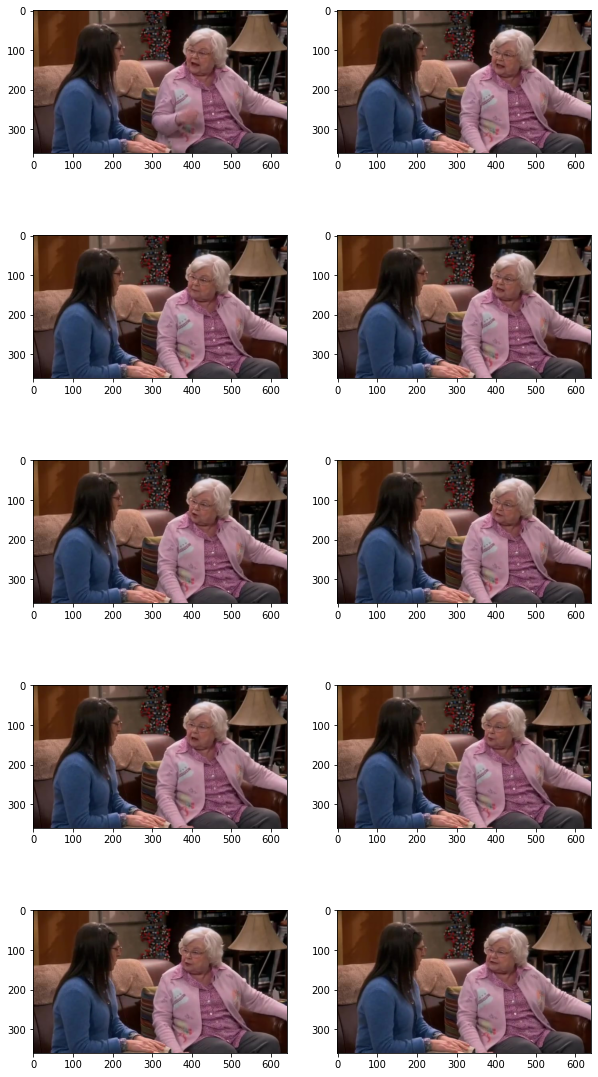

In [460]:
plot_max_relevance_frames(vid_name, start_index, window_size)

In [470]:
"""
Returns the unique objects detected in an episode from
a start frame index, given the window size
"""

def get_unique_objs_in_chunk(episode, start_index, window_size):
  num_frames = len(vis_concepts[episode])
  temp = set()
  for i in range(start_index, start_index + window_size, 1):
    arr = get_detected_objects(episode, i)
    arr = phrase_splitter(arr)
    for w in arr:
      temp.add(w)
  return list(temp)

In [472]:
get_unique_objs_in_chunk('s09e14_seg02_clip_04', start_index, window_size)

['wall',
 'shade',
 'blue',
 'lamp',
 'stool',
 'glasses',
 'pink',
 'brown',
 'button',
 'watch',
 'head',
 'shirt',
 'blonde',
 'pants',
 'gray',
 'white',
 'hand',
 'arm',
 'hair',
 'woman',
 'christmas',
 'tree',
 'long',
 'couch',
 'women']

In [ ]:
!git clone https://github.com/ritzdevp/team-samosa-tvqa

Cloning into 'team-samosa-tvqa'...
remote: Enumerating objects: 262, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 262 (delta 4), reused 0 (delta 0), pack-reused 252
Receiving objects: 100% (262/262), 1.29 MiB | 9.55 MiB/s, done.
Resolving deltas: 100% (141/141), done.


In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1m8bC4lefQsP2tRhMLAaiy0AVuBXZtegc' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1m8bC4lefQsP2tRhMLAaiy0AVuBXZtegc" -O tvqa_imagenet_resnet101_pool5_hq.tar.gz && rm -rf /tmp/cookies.txt

--2022-04-30 16:32:51--  https://docs.google.com/uc?export=download&confirm=t&id=1m8bC4lefQsP2tRhMLAaiy0AVuBXZtegc
Resolving docs.google.com (docs.google.com)... 173.194.212.113, 173.194.212.139, 173.194.212.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.212.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-6g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sq0om2avqpsa9jon225qm76tkuj4dnde/1651336350000/07218467666063224277/*/1m8bC4lefQsP2tRhMLAaiy0AVuBXZtegc?e=download [following]
--2022-04-30 16:32:51--  https://doc-0k-6g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sq0om2avqpsa9jon225qm76tkuj4dnde/1651336350000/07218467666063224277/*/1m8bC4lefQsP2tRhMLAaiy0AVuBXZtegc?e=download
Resolving doc-0k-6g-docs.googleusercontent.com (doc-0k-6g-docs.googleusercontent.com)... 172.217.193.132, 2607:f8b0:400c:c03::84
Connecting to doc-0k-6g-docs.googleusercontent.com (doc-

In [ ]:
!tar xzf /content/tvqa_imagenet_resnet101_pool5_hq.tar.gz

In [ ]:
!pip install -q transformers datasets

     |████████████████████████████████| 4.0 MB 3.9 MB/s 
     |████████████████████████████████| 325 kB 49.3 MB/s 
     |████████████████████████████████| 77 kB 6.3 MB/s 
     |████████████████████████████████| 596 kB 46.2 MB/s 
     |████████████████████████████████| 895 kB 44.5 MB/s 
     |████████████████████████████████| 6.6 MB 44.8 MB/s 
     |████████████████████████████████| 136 kB 60.9 MB/s 
     |████████████████████████████████| 212 kB 58.7 MB/s 
     |████████████████████████████████| 1.1 MB 53.2 MB/s 
     |████████████████████████████████| 127 kB 42.1 MB/s 
     |████████████████████████████████| 144 kB 54.0 MB/s 
     |████████████████████████████████| 94 kB 2.8 MB/s 
     |████████████████████████████████| 271 kB 61.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which i

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
import transformers
from transformers import BertTokenizer, VisualBertForQuestionAnswering, VisualBertModel

In [ ]:
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased",  output_hidden_states = True)
bert_model = VisualBertModel.from_pretrained("uclanlp/visualbert-vqa-coco-pre",  output_hidden_states = True)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/631 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/428M [00:00<?, ?B/s]

Some weights of the model checkpoint at uclanlp/visualbert-vqa-coco-pre were not used when initializing VisualBertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing VisualBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing VisualBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
% cd /content/team-samosa-tvqa/baseline_repo

/content/team-samosa-tvqa/baseline_repo


In [ ]:
! chmod 777 /content/team-samosa-tvqa/baseline_repo/setup.sh

In [ ]:
! /content/team-samosa-tvqa/baseline_repo/setup.sh

--2022-04-29 02:50:49--  https://tvqa.cs.unc.edu/files/tvqa_qa_release.tar.gz
Resolving tvqa.cs.unc.edu (tvqa.cs.unc.edu)... 152.2.132.230
Connecting to tvqa.cs.unc.edu (tvqa.cs.unc.edu)|152.2.132.230|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14474003 (14M) [application/x-gzip]
Saving to: ‘/content/drive/MyDrive/MMML/tvqa_qa_release.tar.gz’

tvqa_qa_release.tar 100%[===================>]  13.80M  6.64MB/s    in 2.1s    

2022-04-29 02:50:54 (6.64 MB/s) - ‘/content/drive/MyDrive/MMML/tvqa_qa_release.tar.gz’ saved [14474003/14474003]

--2022-04-29 02:50:54--  https://tvqa.cs.unc.edu/files/tvqa_subtitles.tar.gz
Resolving tvqa.cs.unc.edu (tvqa.cs.unc.edu)... 152.2.132.230
Connecting to tvqa.cs.unc.edu (tvqa.cs.unc.edu)|152.2.132.230|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15495443 (15M) [application/x-gzip]
Saving to: ‘/content/drive/MyDrive/MMML/tvqa_subtitles.tar.gz’

tvqa_subtitles.tar. 100%[===================>]  14.78M 

In [ ]:
# #debugging
import h5py
import torch
from torch.nn.utils.rnn import pad_sequence
# from CONSTANTS import RESNET_FEATURES
RESNET_FEATURES="/content/tvqa_imagenet_pool5_hq.h5"

h5driver=None
vid_feat_path=RESNET_FEATURES
vid_h5 = h5py.File(vid_feat_path, "r", driver=h5driver)

def read_resnet_feats(video_names, stride=8):
    video_resnet_feat = []
    for video in video_names:
        video_resnet_feat.append(torch.tensor(vid_h5[video][::stride, :], device="cuda"))

    video_resnet_feat =  pad_sequence(video_resnet_feat, batch_first=True)
    
    return video_resnet_feat

In [ ]:
class TVQA_Multimodal(torch.nn.Module):

    def __init__(self):

        super(TVQA_Multimodal, self).__init__()

        self.bert_tokenizer = bert_tokenizer
        self.bert_model = bert_model.to("cuda")

        self.proj = torch.nn.Sequential(torch.nn.Linear(768, 256),
                                        torch.nn.GELU(),
                                        torch.nn.Linear(256, 64),
                                        torch.nn.GELU(),
                                        torch.nn.Linear(64, 1)).to("cuda")

    def _freeze_bert_weights(self, requires_grad_layers = ['encoder.layer.11',
                                                           'pooler.dense.weight',
                                                           'pooler.dense.bias']):
        for name, p in self.bert_model.named_parameters():
            req_grad = False
            for layer_name in requires_grad_layers:
                if layer_name in name:
                    req_grad = True
                    break

            p.requires_grad = req_grad
        
        return True

    def merge_q_ans(self, que, ans):
        merged = []
        for i in range(len(que)):
          curr = que[i]+ ' [SEP] ' + ans[i]
          merged.append(curr)
        return merged

    def bert_forward(self, question, ans, subt_text, video_names):

        merge_q_ans = self.merge_q_ans(question, ans)

        inputs       = bert_tokenizer(subt_text, 
                                      merge_q_ans,  
                                      padding="max_length",
                                      truncation=True,
                                      return_token_type_ids=True,
                                      return_attention_mask=True,
                                      add_special_tokens=True,
                                      return_tensors="pt")
        
        
        visual_embeds = read_resnet_feats(video_names)

        visual_token_type_ids = torch.ones(visual_embeds.shape[:-1], dtype=torch.long).to("cuda")
        visual_attention_mask = torch.ones(visual_embeds.shape[:-1], dtype=torch.float).to("cuda")
        inputs.update(
            {
                "visual_embeds": visual_embeds,
                "visual_token_type_ids": visual_token_type_ids,
                "visual_attention_mask": visual_attention_mask,
            }
        )
        inputs = inputs.to("cuda")

        output = bert_model(**inputs)

        hidden_states = output.last_hidden_state
        cls_tokens = hidden_states[:,0,:]

        return cls_tokens

    def forward(self, question, subt_text, a0, a1, a2, a3, a4, video_names):

        bert_a0 = self.bert_forward(question=question,
                                    ans=a0,
                                    subt_text=subt_text,
                                    video_names=video_names)        
        score_a0 = self.proj(bert_a0)

        bert_a1 = self.bert_forward(question=question,
                                    ans=a1,
                                    subt_text=subt_text,
                                    video_names=video_names)
        score_a1 = self.proj(bert_a1)

        bert_a2 = self.bert_forward(question=question,
                                    ans=a2,
                                    subt_text=subt_text,
                                    video_names=video_names)
        score_a2 = self.proj(bert_a2)

        bert_a3 = self.bert_forward(question=question,
                                    ans=a3,
                                    subt_text=subt_text,
                                    video_names=video_names)
        
        score_a3 = self.proj(bert_a3)

        bert_a4 = self.bert_forward(question=question,
                                    ans=a4,
                                    subt_text=subt_text,
                                    video_names=video_names)
        
        score_a4 = self.proj(bert_a4)

        # print(" score_a4 ", score_a4.shape)


        logits = torch.cat((score_a0, score_a1, score_a2, score_a3, score_a4), dim=1)

        # print(" logits ", logits.shape)


        return logits


In [ ]:
from CONSTANTS import  BASE_PATH
import json

In [ ]:


class TVQAPlus(torch.utils.data.Dataset):
    def __init__(self, dataset='train'):
        # sample represent how many npy files will be preloaded for one __getitem__ call
        TRAIN_DICT_JSON = BASE_PATH + "/tvqa_plus/tvqa_plus_train.json"
        VAL_DICT_JSON = BASE_PATH + '/tvqa_plus/tvqa_plus_val.json'
        SUBTITLES_DICT_JSON = BASE_PATH + '/tvqa_plus/tvqa_plus_subtitles.json'

        self.dataset = dataset

        train_dict = {}
        val_dict = {}
        subtitles_dict = {}

        with open(TRAIN_DICT_JSON) as f:
          train_dict = json.load(f)

        with open(VAL_DICT_JSON) as f:
          val_dict = json.load(f)

        with open(SUBTITLES_DICT_JSON) as f:
          self.subtitles_dict = json.load(f)

        self.target_dict = {}
        if self.dataset == 'train':
          self.target_dict = train_dict
        elif self.dataset == 'val':
          self.target_dict = val_dict
        else:
          raise Exception(f"Invalid dataset passed {self.dataset}")
      
    def __len__(self):
        return len(self.target_dict)
        
    def __getitem__(self, i):

      question = self.target_dict[i]['q']
    
      a0       = self.target_dict[i]['a0']
      a1       = self.target_dict[i]['a1']
      a2       = self.target_dict[i]['a2']
      a3       = self.target_dict[i]['a3']
      a4       = self.target_dict[i]['a4']

      answer_idx = int(self.target_dict[i]['answer_idx'])
      
      video_name = self.target_dict[i]['vid_name']
      subtitle = self.subtitles_dict[video_name]
      subt_text = subtitle['sub_text']

      return question, subt_text, a0, a1, a2, a3, a4, video_name, answer_idx

In [ ]:
train_dataset = TVQAPlus('train')
test_dataset = TVQAPlus("val")

In [ ]:
batch_size=24
dev_batch_size=12

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = torch.utils.data.DataLoader(test_dataset, batch_size=dev_batch_size, shuffle=False)

In [ ]:
def merge(que, ans):
  merged = []
  for i in range(len(que)):
    curr = que[i]+ ' [SEP] ' + ans[i]
    merged.append(curr)
  return merged

In [ ]:
tvqa_model = TVQA_Multimodal()
tvqa_model._freeze_bert_weights()

print(tvqa_model.named_parameters())

for name, p in tvqa_model.named_parameters():
    print("name", name, "p", p.requires_grad)

<generator object Module.named_parameters at 0x7fbcfbe27350>
name bert_model.embeddings.word_embeddings.weight p False
name bert_model.embeddings.position_embeddings.weight p False
name bert_model.embeddings.token_type_embeddings.weight p False
name bert_model.embeddings.LayerNorm.weight p False
name bert_model.embeddings.LayerNorm.bias p False
name bert_model.embeddings.visual_token_type_embeddings.weight p False
name bert_model.embeddings.visual_position_embeddings.weight p False
name bert_model.embeddings.visual_projection.weight p False
name bert_model.embeddings.visual_projection.bias p False
name bert_model.encoder.layer.0.attention.self.query.weight p False
name bert_model.encoder.layer.0.attention.self.query.bias p False
name bert_model.encoder.layer.0.attention.self.key.weight p False
name bert_model.encoder.layer.0.attention.self.key.bias p False
name bert_model.encoder.layer.0.attention.self.value.weight p False
name bert_model.encoder.layer.0.attention.self.value.bias p Fal

In [ ]:
def val_acc(model, dev_loader, batch_size_dev):
  model.eval()
  num_correct = 0
  for batch_idx, ( question, subt_text, a0, a1, a2, a3, a4, video_names, answer_idx) in enumerate(test_loader):
    answer_idx = answer_idx.to("cuda")
    with torch.no_grad():
      # # IF MODEL does not TAKES VIDEO INPUT

      logits = model.forward(question, subt_text, a0, a1, a2, a3, a4, video_names)

      
    num_correct += int((torch.argmax(logits, axis=1) == answer_idx).sum())
    acc = 100 * num_correct / ((batch_idx + 1) * batch_size_dev)

  dev_acc = 100 * num_correct / (len(dev_loader) * batch_size_dev)

  model.train()
  return dev_acc

In [ ]:
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

optimizer = optim.Adam(tvqa_model.parameters(), lr=1e-3)
criterion = torch.nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
torch.cuda.empty_cache()

# Set the verbosity level as follows:

transformers.logging.set_verbosity_error()


# bert_model.cuda()

model_version="bert_backprop.pth"


epoch = 0
best_dev_acc = 0
loss_epoch = 0

while epoch < 100:
  
    num_correct = 0

    batch_bar = tqdm(total=len(train_loader), dynamic_ncols=True, leave=False, position=0, desc='Train')
    tvqa_model.train()


    if os.path.exists(f'/content/drive/MyDrive/MMML/{model_version}'):
        # model.load_state_dict(torch.load(f'{SAVE_PATH}{EXP_TAG}/model_saved_epoch{epoch-1}.pt')) 

        checkpoint = torch.load(f'/content/drive/MyDrive/MMML/{model_version}')
        tvqa_model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        epoch = checkpoint['epoch'] + 1

    for batch_idx, ( question, subt_text, a0, a1, a2, a3, a4, video_names, answer_idx) in enumerate(train_loader):

        logits = tvqa_model.forward(question, subt_text, a0, a1, a2, a3, a4, video_names)
        answer_idx = answer_idx.to("cuda")
        loss = criterion(logits, answer_idx)
        num_correct += int((torch.argmax(logits, axis=1) == answer_idx).sum())

        loss.backward()
        optimizer.step()
        loss_epoch += float(loss)
        optimizer.zero_grad()

        batch_bar.set_postfix(
            acc="{:.04f}%".format(100 * num_correct / ((batch_idx + 1) * batch_size)),
            loss="{:.04f}".format(float(loss_epoch / (batch_idx + 1))),
            num_correct=num_correct,
            lr="{:.04f}".format(float(optimizer.param_groups[0]['lr'])))
        
        batch_bar.update() # Update tqdm bar

        # break
        torch.cuda.empty_cache()


    batch_bar.close() # You need this to close the tqdm bar

    train_acc = 100 * num_correct / (len(train_loader) * batch_size)
    dev_acc = val_acc(tvqa_model, test_loader, dev_batch_size)

    print(f'Epoch {epoch} Loss {loss_epoch} train_acc {train_acc}, devacc {dev_acc}')

    torch.save({
            'epoch': epoch,
            'model_state_dict': tvqa_model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss_epoch/len(train_loader),
            },  f'/content/drive/MyDrive/MMML/{model_version}')
    
    if dev_acc > best_dev_acc:
        best_dev_acc = dev_acc

        torch.save({
                'epoch': epoch,
                'model_state_dict': tvqa_model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': loss_epoch/len(train_loader),
                },  f'/content/drive/MyDrive/MMML/best_dev_acc_{model_version}')

Epoch 1 Loss 1386.7436982393265 train_acc 40.97505091649695, devacc 47.652116402116405


Epoch 2 Loss 2743.939011514187 train_acc 41.88306177868296, devacc 50.16534391534392


Epoch 3 Loss 4081.0521820038557 train_acc 43.037169042769854, devacc 50.56216931216931


Epoch 4 Loss 5410.711723670363 train_acc 43.890020366598776, devacc 50.56216931216931


Epoch 5 Loss 6738.600890740752 train_acc 43.694840461642904, devacc 51.9510582010582


Epoch 6 Loss 8055.675280854106 train_acc 44.259164969450104, devacc 51.785714285714285


Epoch 7 Loss 9371.353895530105 train_acc 44.56890699253225, devacc 50.76058201058201


Train:  91%|█████████ | 895/982 [1:29:51<08:43,  6.01s/it, acc=44.5158%, loss=11.8065, lr=0.0010, num_correct=9562]

In [ ]:
torch.save({
      'epoch': epoch,
      'model_state_dict': tvqa_model.state_dict(),
      'optimizer_state_dict': optimizer.state_dict(),
      'loss': loss_epoch/len(train_loader),
      },  f'/content/drive/MyDrive/MMML/bert_backprop.pth')

In [ ]:
tvqa_model = TVQA_Multimodal()
tvqa_model._freeze_bert_weights()
# print(tvqa_model)
# tvqa_model._free

for name, p in tvqa_model.bert_model.named_parameters():
    print("name", name, "p", p.shape, "p.requires_grad", p.requires_grad)